#### J034 Meghna Jayakar Lab 2

28/7/24

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
import re
import gensim.downloader as api
from gensim.models import Word2Vec, KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Meghna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Part 1

#### Pretrained Model 

In [2]:
wordvec_pretrained = api.load('word2vec-google-news-300')

#### Similar Words 

In [3]:
words = ['beans', 'planet', 'nature', 'drink', 'protein']

similar_words = {word: wordvec_pretrained.most_similar(word, topn = 3) for word in words}
similar_words

{'beans': [('bean', 0.7045024037361145),
  ('peas', 0.6134034991264343),
  ('green_beans', 0.6008013486862183)],
 'planet': [('Earth', 0.7139990329742432),
  ('earth', 0.6802847981452942),
  ('planetary', 0.644505500793457)],
 'nature': [('natures', 0.5835949182510376),
  ('Purists_insist', 0.4903858006000519),
  ('inherently', 0.4836791455745697)],
 'drink': [('drinks', 0.8052950501441956),
  ('drinking', 0.7559558749198914),
  ('alcoholic_drink', 0.7126703262329102)],
 'protein': [('proteins', 0.858455240726471),
  ('amino_acid', 0.7720292210578918),
  ('enzyme', 0.7711475491523743)]}

#### Examples similar to king - man + woman ~= queen

In [4]:
wordvec_pretrained.most_similar(positive = ['king', 'woman'], negative = ['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [5]:
wordvec_pretrained.most_similar(positive = ['tea', 'beans'], negative = ['leaf'])

[('coffee', 0.4934612810611725),
 ('teas', 0.48395851254463196),
 ('chai_tea', 0.47217458486557007),
 ('Tea', 0.4674395024776459),
 ('coffees', 0.45822662115097046),
 ('baked_beans', 0.4503019452095032),
 ('bean', 0.4476395547389984),
 ('biscuits', 0.44554802775382996),
 ('chili', 0.4315793812274933),
 ('Freshly_brewed', 0.4290580451488495)]

In [6]:
wordvec_pretrained.most_similar(positive = ['leaf', 'nature'], negative = ['pots'])

[('flora', 0.36876314878463745),
 ('characteristic', 0.36849427223205566),
 ('naturally_occurring_phenomena', 0.36782753467559814),
 ('Purists_insist', 0.36593127250671387),
 ('conservational', 0.3587317168712616),
 ('twig_dieback', 0.3510700762271881),
 ('meadow_vole', 0.350955992937088),
 ('Darwinian_evolutionary', 0.3505227267742157),
 ('epistasis', 0.349613755941391),
 ('fallenness', 0.3474510908126831)]

In [7]:
wordvec_pretrained.most_similar(positive = ['fruit', 'banana'], negative = ['yellow'])

[('mango', 0.6417113542556763),
 ('mangoes', 0.5908397436141968),
 ('bananas', 0.5883112549781799),
 ('citrus_fruit', 0.5845972895622253),
 ('fruits', 0.5564371943473816),
 ('melon', 0.5529492497444153),
 ('apple', 0.5521842241287231),
 ('pears', 0.5484809875488281),
 ('avocados', 0.5483839511871338),
 ('pineapples', 0.5460231900215149)]

In [8]:
wordvec_pretrained.most_similar(positive = ['sun', 'planets'], negative = ['moon'])

[('planets_orbiting_stars', 0.5176407694816589),
 ('sunlight', 0.5113802552223206),
 ('galaxies', 0.5063422918319702),
 ('suns', 0.49718567728996277),
 ('sun_rays', 0.4939121901988983),
 ('hot_Jupiters', 0.4930727183818817),
 ('habitable_zones', 0.48576971888542175),
 ('spiral_galaxies', 0.4850446283817291),
 ('ultraviolet_radiation', 0.4836841821670532),
 ('rocky_planets', 0.4804089665412903)]

In [9]:
wordvec_pretrained.most_similar(positive = ['planet', 'moon'], negative = ['diamonds'])

[('Earth', 0.6185060143470764),
 ('Red_Planet', 0.5581027865409851),
 ('lunar', 0.5444241762161255),
 ('cosmos', 0.5381833910942078),
 ('earth', 0.5360315442085266),
 ('Mars', 0.5326891541481018),
 ('planetary', 0.5285198092460632),
 ('lunar_surface', 0.5217981338500977),
 ('Gliese_###c', 0.5213679075241089),
 ('planetoid', 0.514860987663269)]

In [10]:
wordvec_pretrained.most_similar(positive = ['planet', 'rings'], negative = ['life'])

[('outermost_ring', 0.4869554340839386),
 ('moonlets', 0.47357580065727234),
 ('ring', 0.4671682119369507),
 ('spacecraft_flyby', 0.4657410681247711),
 ('moons', 0.44010695815086365),
 ('Earths', 0.4343738555908203),
 ('Epsilon_Eridani', 0.4341619312763214),
 ('authors_Anne_Verbiscer', 0.4296433925628662),
 ('Saturn_outermost', 0.4221850037574768),
 ('laser_gyros', 0.4219174385070801)]

### Part 2

#### Text EDA

In [141]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [13]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


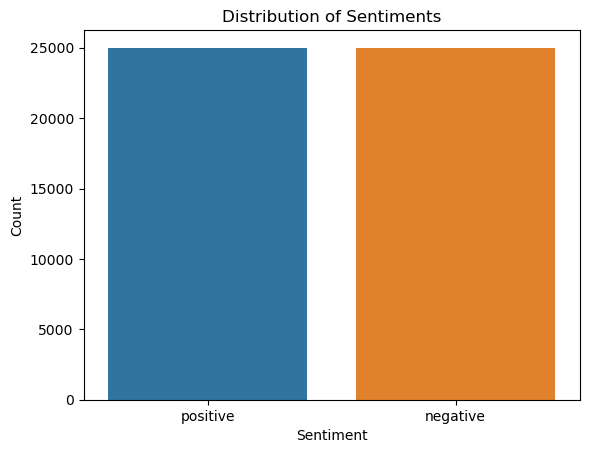

In [14]:
sns.countplot(x = 'sentiment', data = df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#### Text Cleaning

In [33]:
stop_words = set(stopwords.words('english'))
remove_html = re.compile(r'<.*?>')
non_alpha_pattern = re.compile(r'[^a-z\s]')

def clean_text(text):
    text = text.lower()
    text = remove_html.sub(' ', text)
    text = non_alpha_pattern.sub('', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [34]:
def process_data_in_chunks(df, chunk_size = 5000):
    cleaned_chunks = []
    for start in range(0, df.shape[0], chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end].copy()
        chunk['cleaned_review'] = chunk['review'].apply(clean_text)
        cleaned_chunks.append(chunk)
    return pd.concat(cleaned_chunks, ignore_index = True)

In [35]:
df_cleaned = process_data_in_chunks(df)

In [36]:
df_cleaned

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,negative,im going disagree previous comment side maltin...


In [40]:
positive_reviews = ' '.join(df_cleaned[df_cleaned['sentiment'] == 'positive'].cleaned_review)
negative_reviews = ' '.join(df_cleaned[df_cleaned['sentiment'] == 'negative'].cleaned_review)

In [41]:
positive_wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(positive_reviews)
negative_wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(negative_reviews)

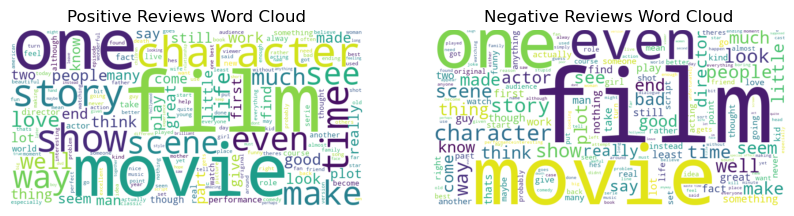

In [42]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation = 'bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation = 'bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

#### Training a Model using Skip-gram Vectors

In [43]:
df_cleaned['tokens'] = df_cleaned['cleaned_review'].apply(word_tokenize)

In [66]:
skipgram = Word2Vec(sentences = df_cleaned['tokens'], vector_size = 100, window = 5, min_count = 1, sg = 1)

In [67]:
skipgram.save('skipgram.model')

In [68]:
x = [np.mean([skipgram.wv[token] for token in tokens if token in skipgram.wv] or [np.zeros(100)], axis = 0) for tokens in df_cleaned['tokens']]
y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [70]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [71]:
ypreds_skipgram = logreg.predict(xtest)
ypreds_skipgram

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [72]:
print(f'Accuracy: {accuracy_score(ytest, ypreds_skipgram) * 100}%')

Accuracy: 87.8%


In [73]:
print(f'F1 Score: {f1_score(ytest, ypreds_skipgram).round(4) * 100}')

F1 Score: 87.9


In [74]:
print(classification_report(ytest, ypreds_skipgram))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4961
           1       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



#### Training a Model using CBoW Vectors

In [75]:
cbow = Word2Vec(sentences = df_cleaned['tokens'], vector_size = 100, window = 5, min_count = 1, sg = 0)

In [76]:
cbow.save('cbow.model')

In [77]:
x = [np.mean([cbow.wv[token] for token in tokens if token in cbow.wv] or [np.zeros(100)], axis = 0) for tokens in df_cleaned['tokens']]
y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [79]:
logreg.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [80]:
ypreds_cbow = logreg.predict(xtest)
ypreds_cbow

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [81]:
print(f'Accuracy: {accuracy_score(ytest, ypreds_cbow) * 100}%')

Accuracy: 86.2%


In [82]:
print(f'F1 Score: {f1_score(ytest, ypreds_cbow).round(4) * 100}')

F1 Score: 86.42


In [83]:
print(classification_report(ytest, ypreds_cbow))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.86      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



#### Training a Model using Pretrained Word2Vec Vectors

In [100]:
def get_wordvectors(tokens, model, vector_size = 200):
    vectors = [model[word] for word in tokens if word in model]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis = 0)

In [102]:
df_cleaned['vector'] = df_cleaned['tokens'].apply(lambda tokens: get_wordvectors(tokens, wordvec_pretrained))

In [103]:
x = np.array(df_cleaned['vector'].tolist())
y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [104]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [105]:
logreg.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [106]:
ypreds_pretrained = logreg.predict(xtest)
ypreds_pretrained

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [107]:
print(f'Accuracy: {accuracy_score(ytest, ypreds_pretrained) * 100}%')

Accuracy: 85.22%


In [108]:
print(f'F1 Score: {f1_score(ytest, ypreds_pretrained).round(4) * 100}')

F1 Score: 85.34


In [109]:
print(classification_report(ytest, ypreds_pretrained))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



#### Optimizing Skip-gram Model

In [111]:
optimized_skipgram = Word2Vec(df_cleaned['tokens'], vector_size = 200, window = 7, min_count = 1, sg = 1)

In [114]:
optimized_skipgram.save('optimized_skipgram.model')

In [116]:
x = [np.mean([optimized_skipgram.wv[token] for token in tokens if token in optimized_skipgram.wv] or [np.zeros(200)], axis = 0) for tokens in df_cleaned['tokens']]
y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [117]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [118]:
logreg.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [119]:
ypreds_opt_skipgram = logreg.predict(xtest)
ypreds_opt_skipgram

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [124]:
print(f'Accuracy: {accuracy_score(ytest, ypreds_opt_skipgram) * 100}%')

Accuracy: 88.33%


In [125]:
print(f'F1 Score: {f1_score(ytest, ypreds_opt_skipgram).round(4) * 100}')

F1 Score: 88.46000000000001


In [126]:
print(classification_report(ytest, ypreds_opt_skipgram))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



#### Optimizing CBoW Model

In [127]:
optimized_cbow = Word2Vec(df_cleaned['tokens'], vector_size = 200, window = 7, min_count = 1, sg = 0)

In [128]:
optimized_cbow.save('optimized_cbow.model')

In [129]:
x = [np.mean([optimized_cbow.wv[token] for token in tokens if token in optimized_cbow.wv] or [np.zeros(200)], axis = 0) for tokens in df_cleaned['tokens']]
y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [130]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [131]:
logreg.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [132]:
ypreds_opt_cbow = logreg.predict(xtest)
ypreds_opt_cbow

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [133]:
print(f'Accuracy: {accuracy_score(ytest, ypreds_opt_cbow) * 100}%')

Accuracy: 86.68%


In [134]:
print(f'F1 Score: {f1_score(ytest, ypreds_opt_cbow).round(4) * 100}')

F1 Score: 86.88


In [135]:
print(classification_report(ytest, ypreds_opt_cbow))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



#### Metrics 

In [140]:
results = {'Model': ['Skip-gram', 'CBoW', 'Pretrained Word2Vec', 'Optimized Skip-gram', 'Optimized CBoW'],
          'F1 Score': [f1_score(ytest, ypreds_skipgram), f1_score(ytest, ypreds_cbow), f1_score(ytest, ypreds_pretrained), f1_score(ytest, ypreds_opt_cbow), f1_score(ytest, ypreds_opt_skipgram)]}

results_table = pd.DataFrame(results)
results_table

,Model,F1 Score
0,Skip-gram,0.879040
1,CBoW,0.864227
2,Pretrained Word2Vec,0.853402
3,Optimized Skip-gram,0.868846
4,Optimized CBoW,0.884650
